# NLP for Depression Prediction

## Installs

In [1]:
%pip install nltk scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Imports

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

## Load Dataset

Label column is if the text should be considered depressed

In [3]:
data=pd.read_csv("./datasets/Mental-Health-Twitter.csv", index_col=0)
data.sample(10)
# data.columns

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
9977,589525784231944192,Sat Apr 18 20:27:54 +0000 2015,RT @YoungLife: Can we get a slow clap for hamm...,2766067037,78,175,664,1148,73,1
1368,580408324488847361,Tue Mar 24 16:38:22 +0000 2015,(1/2) To mark the start of #autismawareness we...,1629737760,2377,738,3189,5624,4,1
12029,810572263938473984,Sun Dec 18 19:47:42 +0000 2016,"Since the #Lions offense can't score a TD, the...",18831261,884,2389,8466,57269,0,0
5929,596958401709608960,Sat May 09 08:42:28 +0000 2015,I'm seriously rejoining the gym and training l...,718984718,501,149,472,945,0,1
1150,559747980174327808,Mon Jan 26 16:21:32 +0000 2015,I'm doing INSANITY MAX:30™ - MAX OUT ABS in T...,221788137,155,355,130,5479,0,1
6364,595445717218369536,Tue May 05 04:31:36 +0000 2015,Mother and Daughter selfie 💖 http://t.co/PJ1l4...,1306425758,734,1899,154,5929,0,1
1749,593282239384915968,Wed Apr 29 05:14:43 +0000 2015,She Talk: WhyDepressionHitsSoHardAthome | http...,1616997456,476,1235,0,21533,0,1
16753,810134718725263360,Sat Dec 17 14:49:03 +0000 2016,Highlight of the year indeed.,490044008,1849,561,8229,86352,0,0
12700,816698690740097024,Wed Jan 04 17:31:56 +0000 2017,2016 in Charts. (And Can Trump Deliver in 2017...,145626605,126,621,22,2111,0,0
2244,587013393149722625,Sat Apr 11 22:04:33 +0000 2015,Overcome Depression: Tristan Walker: The Visib...,1616997456,476,1235,0,21533,0,1


<Axes: xlabel='label', ylabel='count'>

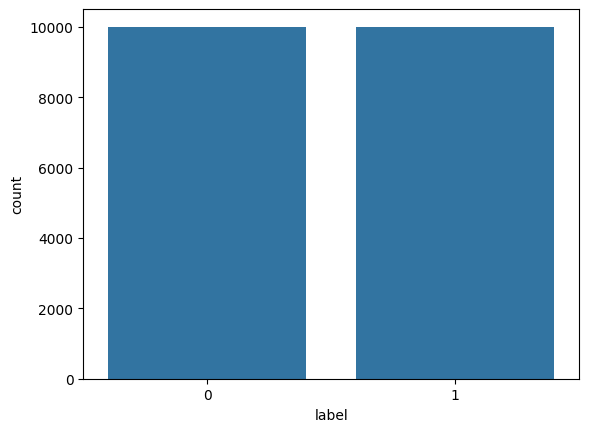

In [4]:
sns.countplot(data=data, x="label")

## Natural Language Processing Libraries

In [5]:
import re
import nltk
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/robrohan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/robrohan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robrohan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Text Clean Up

A lemmatizer is a text processing tool used in natural language processing (NLP) to reduce words to their base or root form, known as a lemma. Unlike stemming, which simply chops off the ends of words to return the root form, lemmatization considers the context and meaning of the word.

In [6]:
lemma = nltk.WordNetLemmatizer()
text_list=[]
for text in data.post_text:
    description = re.sub("[^a-zA-Z]"," ",text)                                            # a remover from text without letters
    description = description.lower()
    description = nltk.word_tokenize(text)
    # description = [word for word in text if word not in set(stopwords.words("english"))] Done in vectorize below
    description = [lemma.lemmatize(word) for word in text]                                # lemmatize the words
    description = "".join(description)                                                    # put the words back into a single blob
    text_list.append(description)


## Vectorize the Text

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=1024, stop_words="english")   # Use 512 words and remove english stop words
sparce_matrix = count_vectorizer.fit_transform(text_list).toarray()

## Set x and y axis

In [8]:
x = sparce_matrix
y = data["label"].values

## Split into train and test

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Algorithm to predict depression

Gaussian Naive Bayes is a probabilistic machine learning algorithm based on Bayes' Theorem, used primarily for classification tasks. It's called "naive" because it assumes that the features are independent of each other, which is often not the case in real-world data. Despite this simplifying assumption, it often performs well and is widely used due to its simplicity and efficiency.

In [10]:
from sklearn.naive_bayes import GaussianNB
ga=GaussianNB()
ga.fit(x_train,y_train)

GaussianNB()

## Testing

In [11]:
ga.score(x_test, y_test)

0.7681666666666667

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ga.predict(x_test))

array([[2009,  974],
       [ 417, 2600]])